# Using Polytope package

In [1]:
"""How to compute a polytope's volume."""
import numpy as np
import polytope

# constructing a convex polytope and computing its volume
vertices = np.array([[0.0, 0.0], [1.0, 0.0], [0.0, 1.0]])
hull = polytope.qhull(vertices)
    # `hull` is an instance of the class `polytope.polytope.Polytope`
    # which is for representing a convex polytope
print(hull.volume)

# constructing a nonconvex polytope and computing its volume
vertices_1 = np.array([[0.0, 0.0], [0.0, 1.0], [2.0, 1.0]])
vertices_2 = np.array([[0.0, 1.0], [1.0, 1.0], [1.0, 2.0], [0.0, 2.0]])
hull_1 = polytope.qhull(vertices_1)  # convex hull of vertices in `vertices_1`
hull_2 = polytope.qhull(vertices_2)  # convex hull of vertices in `vertices_2`
nonconvex = hull_1.union(hull_2)  # construct union of convex polytopes
    # `nonconvex` is an instance of the class `polytope.polytope.Region`
    # which is for representing any polytope, including nonconvex ones,
    # and in this case can also be constructed with
    # `polytope.polytope.Region([hull_1, hull_2])`
print(polytope.volume( nonconvex ))

`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


0.478
1.9920000000000002


In [2]:
polytope.volume(nonconvex) #, nsamples=50000)

1.9920000000000002

In [3]:
nonconvex.volume

1.9920000000000002

# Find Ellipse with cvxpy

In [4]:
import polytope as pt
# problem data
n = 2;
points = np.array
px = np.array([0, .5, 2, 3, 1]).reshape(-1,1);
py = np.array([0, 1, 1.5, .5, -.5]).reshape(-1,1);
points = np.append( px, py, axis=1 )
m = px.shape[1]
pxint = np.sum(px)/m; 
pyint = np.sum(py)/m;
px = np.append(px,  px[0])
py = np.append(py, py[0])

In [5]:
points

array([[ 0. ,  0. ],
       [ 0.5,  1. ],
       [ 2. ,  1.5],
       [ 3. ,  0.5],
       [ 1. , -0.5]])

In [6]:
 hull = pt.qhull(points)

In [7]:
A, b = hull.A, hull.b.reshape(-1,1)

In [8]:
A

array([[-0.31623,  0.94868],
       [ 0.70711,  0.70711],
       [ 0.44721, -0.89443],
       [-0.89443,  0.44721],
       [-0.44721, -0.89443]])

In [9]:
b

array([[0.79057],
       [2.47487],
       [0.89443],
       [0.     ],
       [0.     ]])

In [10]:
import cvxpy as cp
# formulate and solve the problem
B = cp.Variable((n,n), symmetric=True)
d = cp.Variable((n,1))
objective = cp.Maximize( cp.log_det( B ) )
const = []
for i in range( points.shape[0] ):
    const += [ cp.norm( B @ A[i,:].reshape(-1,1) ) + A[i,:].reshape(1,-1) @ d <= b[i,0] ]
prob = cp.Problem( objective, const )
prob.solve()

-0.09773305109039437

In [11]:
ellipse_n = 2
ellipse_num_planes = 5
ellipse_B = cp.Variable((ellipse_n,ellipse_n), symmetric=True)
ellipse_d = cp.Variable((ellipse_n,1))
ellipse_A = cp.Parameter((ellipse_num_planes,2))
ellipse_b = cp.Parameter((ellipse_num_planes,1))
ellipse_objective = cp.Maximize( cp.log_det( ellipse_B ) )
ellipse_const = []
for ellipse_i in range( ellipse_A.shape[0] ):
    ellipse_const += [ cp.norm( ellipse_B @ ellipse_A[ellipse_i,:]) + ellipse_A[ellipse_i,:] @ ellipse_d <= ellipse_b[ellipse_i,0] ]
ellipse_prob = cp.Problem( ellipse_objective, ellipse_const )

In [12]:
from cvxpylayers.jax import CvxpyLayer
import jax
cvxpylayer = CvxpyLayer(ellipse_prob, parameters=[ellipse_A, ellipse_b], variables=[ellipse_B, ellipse_d])
A_jax = A
b_jax = b

In [13]:
solution = cvxpylayer(A_jax, b_jax)

/home/hardik/Desktop/Research/social-navigation/venv11/lib/python3.11/site-packages/cvxpylayers/jax/cvxpylayer.py:167: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  sol[j].append(jnp.expand_dims(jnp.array(
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [14]:
solution

(Array([[1.15657, 0.17477],
        [0.17477, 0.81051]], dtype=float32),
 Array([[1.34374],
        [0.5    ]], dtype=float32))

In [15]:
solution[0]

Array([[1.15657, 0.17477],
       [0.17477, 0.81051]], dtype=float32)

In [16]:
import jax.numpy as jnp
new_fun = lambda A, b: jnp.sum(cvxpylayer(A, b)[0])

In [17]:
new_fun( A_jax, b_jax )

Array(2.31662, dtype=float32)

In [18]:
dcvxpylayer = jax.grad(lambda A, b: jnp.sum(cvxpylayer(A, b)[0]), argnums=[0, 1]) # sum of elements of B matrix
gradA, gradb = dcvxpylayer(A_jax, b_jax)

# dcvxpylayer_jit = jit(dcvxpylayer)
# dcvxpylayer_jit( A_jax, b_jax )



/home/hardik/Desktop/Research/social-navigation/venv11/lib/python3.11/site-packages/cvxpylayers/jax/cvxpylayer.py:225: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  grad[j] += [jnp.expand_dims(jnp.array(


# Finding circle with cvxpy

In [19]:
r = cp.Variable()
c = cp.Variable((2,1))
objective2 = cp.Maximize(r)
const2 = []
for i in range( points.shape[0] ):
    const2 += [ A[i,:].reshape(1,-1) @ c + np.linalg.norm(A[i,:]) * r <= b[i,0] ]
prob2 = cp.Problem( objective2, const2 )
prob2.solve()

0.7640840052119809

In [20]:
test = np.empty([2, 2])

In [21]:
test[0,0]

0.0

# Plot results

In [22]:
angles   = np.linspace( 0, 2 * np.pi, 100 )
ellipse_inner  = (B.value @ np.append(np.cos(angles).reshape(1,-1) , np.sin(angles).reshape(1,-1), axis=0 )) + d.value# * np.ones( 1, noangles );
ellipse_outer  = (2* B.value @ np.append(np.cos(angles).reshape(1,-1) , np.sin(angles).reshape(1,-1), axis=0 )) + d.value
circle_inner = c.value + r.value * np.append(np.cos(angles).reshape(1,-1) , np.sin(angles).reshape(1,-1), axis=0 )

3.228

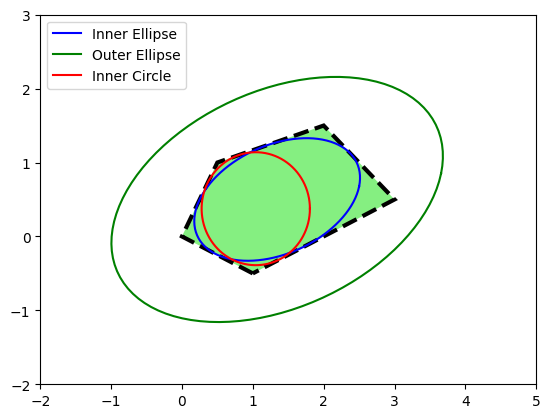

In [23]:
import matplotlib.pyplot as plt
plt.figure()
ax = plt.axes(xlim=(-2,5), ylim=(-2,3))
hull_plot = hull.plot(ax)
ax.plot( ellipse_inner[0,:], ellipse_inner[1,:], 'b', label='Inner Ellipse' )
ax.plot( ellipse_outer[0,:], ellipse_outer[1,:], 'g', label='Outer Ellipse' )
ax.plot( circle_inner[0,:], circle_inner[1,:], 'r', label='Inner Circle' )
ax.legend()
# hull_plot.clear()
hull.volume

# Polytope random function

In [24]:
import polytope as pc
A1 = np.array([[1.0, 0.0],
              [0.0, 1.0],
              [-1.0, -0.0],
              [-0.0, -1.0]])

b1 = np.array([2.0, 1.0, 0.0, 0.0])
p1 = pc.Polytope(A1, b1)

A2 = np.array([[1.0, 0.0],
              [0.0, 1.0],
              [-1.0, -0.0],
              [-0.0, -1.0]])

b2 = np.array([2.0, 1.0, 0.0, 0.0])
p2 = pc.Polytope(A2, b2)

In [25]:
p3 = p1.union(p2)

In [26]:
p3.volume

4.0

In [27]:
polytope.volume(p2)

2.0

In [28]:
import jax.numpy as jnp
from jax import jit, grad
import jax
from jax import config
config.update("jax_enable_x64", True)

In [29]:
jnp.heaviside(jnp.array([1,2,-1]), 1.0)

Array([1., 1., 0.], dtype=float64)

In [30]:
pt.bounding_box(hull)

(array([[-0. ],
        [-0.5]]),
 array([[3. ],
        [1.5]]))

In [31]:
lb, ub = pt.bounding_box(hull)

In [32]:
lb - 0.5

array([[-0.5],
       [-1. ]])

In [33]:
ub + 0.5

array([[3.5],
       [2. ]])

In [34]:
def mc_polytope_volume_org(A, b, samples):
    aux = A @ samples - b
#     print(f"old:{jnp.nonzero(jnp.all(aux < 0, 0))}")
#     return jnp.sum(jnp.nonzero(jnp.all(aux < 0, 0))[0])
    aux = jnp.nonzero(jnp.all(aux < 0, 0))[0].shape[0]    
    vol = (2*bounds)**2 * aux / num_samples
    return vol
mc_polytope_volume_org_grad = grad(mc_polytope_volume_org, 0)
# @jit

def get_intersection_points(ai, bi, lb, ub):

    # lb: assume dim=2
    bpt = []
    # a[0] * ux + a[1] * uy = bi

    #left edge: ux = lb[0]
    if jnp.abs(ai[1])>0.01:
        uy =  (bi - ai[0] * lb[0]) / ai[1]
#         print(f"hello0, uy:{uy}")
        if ((uy <= ub[1]) and (uy >= lb[1])):
            bpt.append( jnp.array([ lb[0], uy ]) )

    #right edge: ux = ub[0]
    if jnp.abs(ai[1])>0.01:
        uy =  (bi - ai[0] * ub[0]) / ai[1]
#         print(f"hello1, uy:{uy}")
        if ((uy <= ub[1]) and (uy >= lb[1])):
            bpt.append( jnp.array([ ub[0], uy ]) )

    #bottom edge: uy = lb[1]
    if jnp.abs(ai[0])>0.01:
        ux =  (bi - ai[1] * lb[1]) / ai[0]
#         print(f"hello2, ux:{ux}")
        if ((ux <= ub[0]) and (ux >= lb[0])):
            bpt.append( jnp.array([ ux, lb[1] ]) )

    #top edge: uy = ub[1]
    if jnp.abs(ai[0])>0.01:
        ux =  (bi - ai[1] * ub[1]) / ai[0]
#         print(f"hello3, ux:{ux}")
        if ((ux <= ub[0]) and (ux >= lb[0])):
            bpt.append( jnp.array([ ux, ub[1] ]) )
    
    if len(bpt)<2:
        print(f"ERROR: Should have been 2 points!")
        
    if len(bpt)>2:
        bpt = [bpt[0], bpt[-1]]
        
    print(bpt)
    return bpt
        
def mc_polytope_volume(A, b, samples):
#     key = jax.random.PRNGKey(10)
#     num_samples=50000
#     bounds = 30
#     samples = jax.random.uniform( key, shape=(2,num_samples), minval=-bounds, maxval=bounds )#A.shape[1]   
    aux = A @ samples - b    
    aux = -aux
    aux = jnp.min(aux, axis=0)
    aux = (jnp.tanh( aux / 0.001 ) + 1.0)/2.0    
    aux = jnp.sum( aux )
    vol = ((2*bounds)**2) * (aux / samples.shape[1]) #num_samples)
    return vol
mc_polytope_volume_grad = jit(grad(mc_polytope_volume, 0))

def mc_polytope_volume_about_lines(A, b, samples, total_volume):
#     key = jax.random.PRNGKey(10)
#     num_samples=50000
#     bounds = 30
#     samples = jax.random.uniform( key, shape=(2,num_samples), minval=-bounds, maxval=bounds )#A.shape[1]   
    aux = A @ samples - b    
    aux = -aux
    aux = jnp.min(aux, axis=0)
    aux = (jnp.tanh( aux / 0.001 ) + 1.0)/2.0    
    aux = jnp.sum( aux )
    vol = total_volume * (aux / samples.shape[1]) #num_samples)
    return vol
mc_polytope_volume_about_lines_grad = jit(grad(mc_polytope_volume_about_lines, 0))

def plot_polytope_lines(ax, hull, u_bound):
    xs = np.linspace( -u_bound, u_bound, 3 )
    A, b = hull.A, hull.b
    alpha = 0.1
    for i in range(A.shape[0]):
        if np.abs(A[i,1])>0.001:
            ax.plot( xs, (b[i] - A[i,0]*xs)/A[i,1], color='k', linestyle='--', alpha = alpha )
        else:
            if np.abs(A[i,0])>0.001:
                ax.axvline( b[i]/A[i,0], color='k', linestyle='--', alpha = alpha )
            else:
                ax.vline( 0.0, color='k', linestyle='--', alpha = alpha )

In [35]:
key = jax.random.PRNGKey(10)
key, subkey = jax.random.split(key)
num_samples=100000 #1000000
bounds = 30
samples = jax.random.uniform( key, shape=(2,num_samples), minval=-bounds, maxval=bounds )#A.shape[1]   


# Method 1

A: [[-0.31623  0.94868]
 [ 0.70711  0.70711]
 [ 0.44721 -0.89443]
 [-0.89443  0.44721]
 [-0.44721 -0.89443]]
b: [0.79057 2.47487 0.89443 0.      0.     ]
[Array([-0.5    ,  0.66667], dtype=float64), Array([3.5, 2. ], dtype=float64)]
[Array([3.5, 0. ], dtype=float64), Array([1.5, 2. ], dtype=float64)]
[Array([3.5 , 0.75], dtype=float64), Array([ 0., -1.], dtype=float64)]
[Array([-0.5, -1. ], dtype=float64), Array([1., 2.], dtype=float64)]
[Array([-0.5 ,  0.25], dtype=float64), Array([ 2., -1.], dtype=float64)]


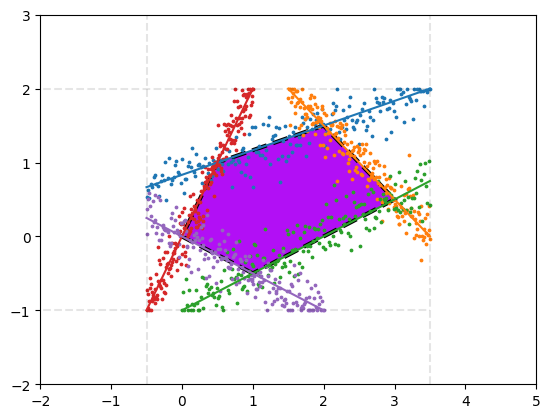

In [36]:
plt.figure()
ax = plt.axes(xlim=(-2,5), ylim=(-2,3))
hull_plot = hull.plot(ax)
lb = jnp.array([-0.5, -1])
ub = jnp.array([3.5, 2.0])
# get_intersection_points( hull.A[0,:], hull.b[0], lb , ub )

control_input_limit_points = np.array([ [lb[0], lb[1]], [lb[0], ub[1]], [ub[0], ub[1]], [ub[0], lb[1]] ])
control_bound_polytope = pt.qhull( control_input_limit_points )
# control_bound_polytope.plot(ax)
plot_polytope_lines( ax, control_bound_polytope, jnp.max(ub) )

print(f"A: {hull.A}")
print(f"b: {hull.b}")
# key = jax.random.PRNGKey(10)
#plot new points
sampled_pts = []
toal_volume = 0
for i in range(hull.A.shape[0]):
    pts = get_intersection_points( hull.A[i,:], hull.b[i], lb , ub )
    if len(pts)>0:
        plt.plot([ pts[0][0], pts[1][0] ], [ pts[0][1], pts[1][1] ]  )
    xs = jnp.linspace(0, pts[1][0]-pts[0][0], 200).reshape(1,-1)
    slope = (pts[1][1]-pts[0][1])/(pts[1][0]-pts[0][0])
    ys = pts[0][1] + slope * xs
    key, subkey = jax.random.split(key)
    ys = jnp.clip( ys + 0.2 * jax.random.normal(subkey, shape=(1,200)), lb[1], ub[1] )
    new_pts = jnp.append( pts[0][0]+xs, ys, axis=0  )
    if i==0:
        sampled_pts = new_pts #jnp.append( pts[0][0]+xs, ys, axis=0  )
    else:
        sampled_pts = jnp.append( sampled_pts, new_pts, axis=1 )
    plt.scatter(new_pts[0,:], new_pts[1,:], s=3)
# plt.scatter(sampled_pts[0,:], sampled_pts[1,:], s=3)
    # now sample points on this line
samples = jnp.append(samples, sampled_pts, axis=1)


# Method 2

[Array([-0.5    ,  0.66667], dtype=float64), Array([3.5, 2. ], dtype=float64)]
[Array([3.5, 0. ], dtype=float64), Array([1.5, 2. ], dtype=float64)]
[Array([3.5 , 0.75], dtype=float64), Array([ 0., -1.], dtype=float64)]
[Array([-0.5, -1. ], dtype=float64), Array([1., 2.], dtype=float64)]
[Array([-0.5 ,  0.25], dtype=float64), Array([ 2., -1.], dtype=float64)]


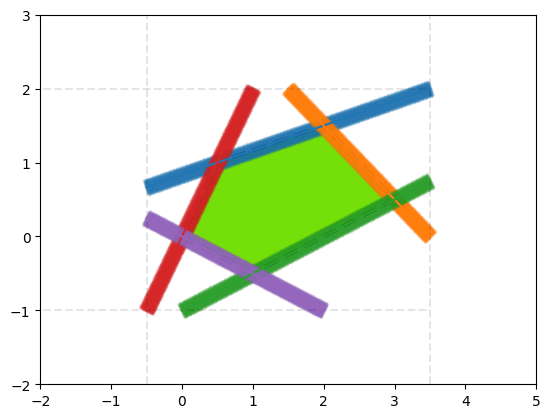

In [37]:
plt.figure()
ax = plt.axes(xlim=(-2,5), ylim=(-2,3))
hull_plot = hull.plot(ax)
lb = jnp.array([-0.5, -1])
ub = jnp.array([3.5, 2.0])
# get_intersection_points( hull.A[0,:], hull.b[0], lb , ub )

control_input_limit_points = np.array([ [lb[0], lb[1]], [lb[0], ub[1]], [ub[0], ub[1]], [ub[0], lb[1]] ])
control_bound_polytope = pt.qhull( control_input_limit_points )
# control_bound_polytope.plot(ax)
plot_polytope_lines( ax, control_bound_polytope, jnp.max(ub) )

# print(f"A: {hull.A}")
# print(f"b: {hull.b}")
key = jax.random.PRNGKey(10)
#plot new points
sampled_pts = []
num_line_points = 200
num_normal_points = 100
increment = 0.001

@jit
def generate_points_about_line(pts): #, num_line_pts, num_normal_points, increment):
    
    xs = jnp.linspace(0, pts[1][0]-pts[0][0], num_line_points).reshape(1,-1)    
    slope = (pts[1][1]-pts[0][1])/(pts[1][0]-pts[0][0])    
    ys = pts[0][1] + slope * xs
    line_pts = jnp.append( pts[0][0]+xs, ys, axis=0  )
    
    # Now N choose points above and below perpendicular to xs, ys
    theta = jnp.arctan(slope)
    slope_n = jnp.pi/2 + theta
    
    length = jnp.linspace(0, 2 * num_normal_points, num_normal_points, dtype=int) - num_normal_points
    length = length * increment
    steps = length * jnp.array([ [jnp.cos(slope_n)], [jnp.sin(slope_n)] ])
    
    # add above points to each point on line
#     temp_points = line_pts.reshape((2,num_line_points,1)) + steps
    temp_points = line_pts.reshape((2,1,line_pts.shape[1])) + steps.reshape( (2,steps.shape[1],1) )
    new_pts = temp_points.reshape( (2, num_normal_points*num_line_points) )
    volume = jnp.linalg.norm( pts[1]-pts[0] ) * num_normal_points * increment
    return new_pts, volume

total_volume = 0
for i in range(hull.A.shape[0]):
    pts = get_intersection_points( hull.A[i,:], hull.b[i], lb , ub )
    if len(pts)>0:
        plt.plot([ pts[0][0], pts[1][0] ], [ pts[0][1], pts[1][1] ]  )
    else:
        continue
        
    new_pts, temp_volume = generate_points_about_line( pts ) #, num_line_points, num_normal_points, increment )
    total_volume = total_volume + temp_volume
#     xs = jnp.linspace(0, pts[1][0]-pts[0][0], num_line_points).reshape(1,-1)    
#     slope = (pts[1][1]-pts[0][1])/(pts[1][0]-pts[0][0])    
#     ys = pts[0][1] + slope * xs
#     line_pts = jnp.append( pts[0][0]+xs, ys, axis=0  )
    
#     # Now N choose points above and below perpendicular to xs, ys
#     theta = np.arctan(slope)
#     slope_n = np.pi/2 + theta
    
#     length = jnp.linspace(0, 2 * num_normal_points, num_normal_points, dtype=int) - num_normal_points
#     length = length * increment
#     steps = length * jnp.array([ [jnp.cos(slope_n)], [jnp.sin(slope_n)] ])
    
#     # add above points to each point on line
#     temp_points = line_pts.reshape((2,1,line_pts.shape[1])) + steps.reshape( (2,steps.shape[1],1) )
#     new_pts = temp_points.reshape( (2, num_normal_points*num_line_points) )
    
    if i==0:
        sampled_pts = new_pts #jnp.append( pts[0][0]+xs, ys, axis=0  )
    else:
        sampled_pts = jnp.append( sampled_pts, new_pts, axis=1 )
    plt.scatter(new_pts[0,::3], new_pts[1,::3], s=3, alpha=0.1)
# plt.scatter(sampled_pts[0,:], sampled_pts[1,:], s=3)
    # now sample points on this line
samples = sampled_pts
# samples = jnp.append(samples, sampled_pts, axis=1)


In [38]:
total_volume

Array(1.71071, dtype=float64)

In [39]:
key, subkey = jax.random.split(key)
jax.random.normal(subkey, shape=(10,))

Array([ 0.07707, -0.32153, -0.46826,  0.65324, -1.86691, -1.02509,
        0.78743, -0.08979, -0.70564, -0.98287], dtype=float64)

In [40]:
# mc_polytope_volume_grad = jit(grad(mc_polytope_volume, 0))
print(f"old volume : { mc_polytope_volume_org(hull.A, hull.b.reshape(-1,1), samples) }")
print(f"new volume: { mc_polytope_volume_about_lines(hull.A, hull.b.reshape(-1,1), samples, total_volume ) } " )
# print(f"old grad: { mc_polytope_volume_org_grad(hull.A, hull.b.reshape(-1,1), samples) }")
print(f"new grad: { mc_polytope_volume_about_lines_grad(hull.A, hull.b.reshape(-1,1), samples, total_volume) }")

old volume : 800.784
new volume: 0.3806103220409748 
new grad: [[-0.55516 -0.56223]
 [-1.30983 -0.51482]
 [-1.2882  -0.0036 ]
 [-0.09708 -0.19452]
 [-0.21722  0.10838]]


In [41]:
# mc_polytope_volume_grad = jit(grad(mc_polytope_volume, 0))
print(f"old volume : { mc_polytope_volume_org(hull.A, hull.b.reshape(-1,1), samples) }")
print(f"new volume: { mc_polytope_volume(hull.A, hull.b.reshape(-1,1), samples ) } " )
# print(f"old grad: { mc_polytope_volume_org_grad(hull.A, hull.b.reshape(-1,1), samples) }")
print(f"new grad: { mc_polytope_volume_grad(hull.A, hull.b.reshape(-1,1), samples) }")

old volume : 800.784
new volume: 800.9521777946219 
new grad: [[-1168.26612 -1183.16086]
 [-2756.38506 -1083.37528]
 [-2710.87767    -7.57747]
 [ -204.302    -409.35183]
 [ -457.12046   228.08187]]


In [42]:
jnp.min( jnp.array([2.00554,1.03843,0.44378, 0.58484, 0.15283]) )
aa = jnp.array([[ 2.05088,  2.50971,  2.00554,  2.83296],
 [ 1.68793,  1.36946,  1.03843,  1.44821],
 [ 0.62205,  0.12897,  0.44378, -0.11737],
 [-0.02076,  0.3479 ,  0.58484,  0.32184],
 [-0.52535, -0.49707,  0.15283, -0.78026]])
jnp.min(aa, axis=0)

Array([-0.52535, -0.49707,  0.15283, -0.78026], dtype=float64)

In [43]:
hull.volume

3.228

In [44]:
# # @jit
# def mc_polytope_volume_jit(A, b, bounds = 30):
#     key = jax.random.PRNGKey(10)
#     num_samples=10000
#     volume = 0
#     samples = jax.random.uniform( key, shape=(A.shape[1],num_samples), minval=-bounds, maxval=bounds )
# #     print(f"A:{A}, samples:{samples}")
    
#     aux = A @ samples - b
#     aux = np.clip(-aux, a_min = 0 )
#     aux = np.nonzero(np.all(aux < 0, 0))[0].shape[0]
#     vol = (2*bounds)**2 * aux / num_samples
#     return vol

In [45]:
mc_polytope_volume_grad = grad(mc_polytope_volume, 0)

In [46]:
mc_polytope_volume_grad( hull.A, hull.b.reshape(-1,1) )

TypeError: mc_polytope_volume() missing 1 required positional argument: 'samples'

In [ ]:
hull.b

In [ ]:
hull.A

In [ ]:
class Test:
    
    def __init__(self):
        self.test = 9
    
    
    def operate(self, x):
        return self.test * jnp.linalg.inv(x)
object = Test()

In [ ]:
func = lambda x: object.operate(x)
func_jit = jit(func)

In [47]:
%timeit  func(jnp.diag(jnp.array([2.0, 0.5])))

NameError: name 'func' is not defined

In [48]:
%timeit  func_jit(jnp.diag(jnp.array([2.0, 0.5])))

NameError: name 'func_jit' is not defined

In [49]:
func_jit(jnp.diag(jnp.array([2.0, 0.5])))

NameError: name 'func_jit' is not defined

In [50]:
object.test = 1

TypeError: cannot set 'test' attribute of immutable type 'object'

In [51]:
func_jit(jnp.diag(jnp.array([2.0, 0.5])))

NameError: name 'func_jit' is not defined

In [52]:
object.test

AttributeError: type object 'object' has no attribute 'test'

In [53]:
import numpy as np
a = np.array([[1,2],[5,6]])
b = np.array([[3,4],[9,10]])

In [54]:
a * b

array([[ 3,  8],
       [45, 60]])

In [55]:
np.sum(a * b)

116

In [149]:
a = jnp.array([ [1,2], [1,2], [1,2] ])

In [153]:
jnp.mean(a, axis=1)

Array([1.5, 1.5, 1.5], dtype=float64)

In [154]:
vertices = np.array([[-1.0, -1.0], [ jjjjjj[1.0, 1.0], [0.0,fffffdddd

SyntaxError: incomplete input (2817348866.py, line 1)

In [265]:
vertices = np.array([[-1.0, -1.0], [-1.0, 1.0], [1.0, 1.0], [1.0, -1.0]])

In [266]:
hull = polytope.qhull(vertices)

In [267]:
A, b = hull.A, hull.b

In [268]:
A

array([[-1., -0.],
       [ 0.,  1.],
       [ 0., -1.],
       [ 1.,  0.]])

In [320]:
A2 = np.append( A, np.array([[ 1, 1 ]]), axis=0 )
b2 = np.append( b, np.array([ np.sqrt(2) ]) )

#-0.1: 0.18288

In [321]:
hull2 = pt.Polytope( A2, b2 )

<Axes: >

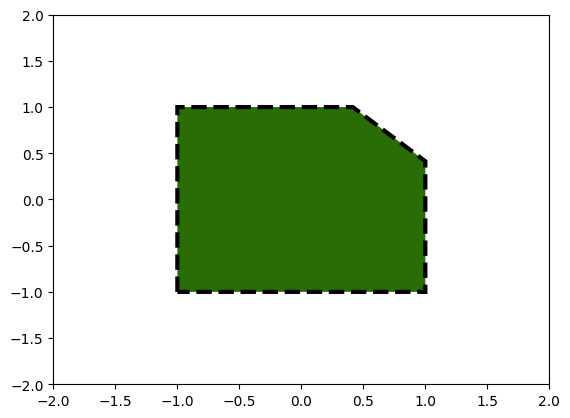

In [322]:
fig, ax = plt.subplots()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
hull2.plot(ax)

In [323]:
ellipse_n = 2
ellipse_num_planes = 5
ellipse_B = cp.Variable((ellipse_n,ellipse_n), symmetric=True)
ellipse_d = cp.Variable((ellipse_n,1))
ellipse_A = cp.Parameter((ellipse_num_planes,ellipse_n), value=A2)
ellipse_b = cp.Parameter((ellipse_num_planes,1), value=b2.reshape(-1,1))
ellipse_objective = cp.Maximize( cp.log_det( ellipse_B ) )
ellipse_const = []
for ellipse_i in range( ellipse_A.shape[0] ):
    ellipse_const += [ cp.norm( ellipse_B @ ellipse_A[ellipse_i,:]) + ellipse_A[ellipse_i,:] @ ellipse_d <= ellipse_b[ellipse_i,0] ]
ellipse_prob = cp.Problem( ellipse_objective, ellipse_const )
ellipse_cvxpylayer = CvxpyLayer(ellipse_prob, parameters=[ellipse_A, ellipse_b], variables=[ellipse_B, ellipse_d])

In [324]:
ellipse_prob.solve()#gp=True, requires_grad=True)

2.920976757940728e-07

In [325]:
ellipse_B.value

array([[ 1., -0.],
       [-0.,  1.]])

In [326]:
ellipse_d.value

array([[0.],
       [0.]])

In [327]:
for i in range( ellipse_A.shape[0]  ):
    print(ellipse_const[i].dual_value)

[0.5]
[0.5]
[0.5]
[0.5]
[0.]


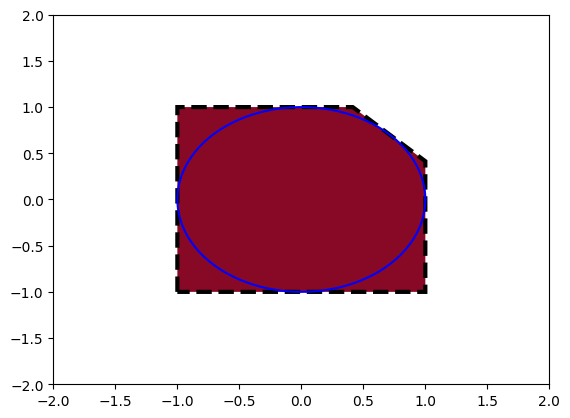

In [328]:
angles   = np.linspace( 0, 2 * np.pi, 100 )
ellipse_plot  = (ellipse_B.value @ np.append(np.cos(angles).reshape(1,-1) , np.sin(angles).reshape(1,-1), axis=0 )) + ellipse_d.value# * np.ones( 1, noangles );

fig, ax = plt.subplots()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
hull2.plot(ax)
ax.plot( ellipse_plot[0,:], ellipse_plot[1,:], 'b', label='Inner Ellipse' )

In [329]:
def volume_ellipse( A, b ):
    solution = ellipse_cvxpylayer(A, b)
    B = solution[0]
    d = solution[1]
    return jnp.linalg.det(B)
def volume_ellipse_full( A, b ):
    solution = ellipse_cvxpylayer(A, b)
    B = solution[0]
    d = solution[1]
    return B, d, jnp.linalg.det(B)
vol_ellipse_grad = grad( volume_ellipse, 1 )

In [330]:
volume_ellipse(A2, b2.reshape(-1,1))

Array(1., dtype=float64)

In [331]:
vol_ellipse_grad(A2, b2.reshape(-1,1))

Array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0. ]], dtype=float64)

## Second case

In [314]:
vertices = np.array([[-1.0, -1.0], [-1.0, 1.0], [1.0, 1.0], [1.0, -1.0]])
hull = polytope.qhull(vertices)
A, b = hull.A, hull.b
A2 = np.append( A, A[[-1],:], axis=0 )
b2 = np.append( b, b[[-1]] )
hull2 = pt.Polytope( A2, b2 )

In [315]:
B, d, vol = volume_ellipse_full( A2, b2.reshape(-1,1) )

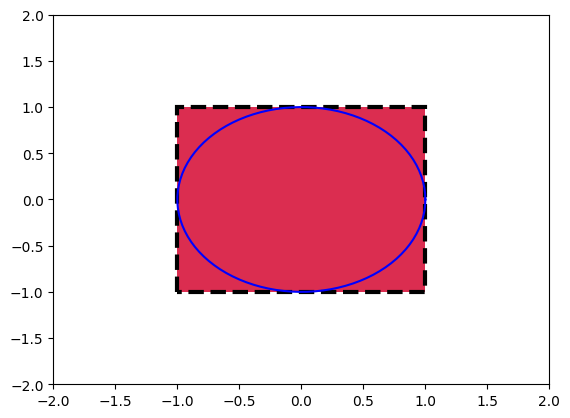

In [316]:
angles   = np.linspace( 0, 2 * np.pi, 100 )
ellipse_plot  = (B @ np.append(np.cos(angles).reshape(1,-1) , np.sin(angles).reshape(1,-1), axis=0 )) + d# * np.ones( 1, noangles );

fig, ax = plt.subplots()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
hull2.plot(ax)
ax.plot( ellipse_plot[0,:], ellipse_plot[1,:], 'b', label='Inner Ellipse' )

In [317]:
vol

Array(1.00001, dtype=float64)

In [318]:
vol_ellipse_grad(A2, b2.reshape(-1,1))

Array([[0.50002],
       [0.49999],
       [0.49999],
       [0.25001],
       [0.25001]], dtype=float64)

In [319]:
ellipse_A.value = A2
ellipse_b.value = b2.reshape(-1,1)
ellipse_prob.solve()

for i in range( ellipse_A.shape[0]  ):
    print(ellipse_const[i].dual_value)

[0.50001]
[0.49999]
[0.49999]
[0.44405]
[0.05596]


In [40]:
np.tan(np.pi/6)

0.5773502691896257

In [41]:
np.tan( np.pi/2 + np.pi/6 )

-1.7320508075688783

In [65]:
theta = jnp.pi/6 # np.arctan(slope)
slope_n = jnp.pi/2 + theta

increment = 0.01
length = jnp.linspace(0, 10, 10, dtype=int)
length = length * increment
steps = length * jnp.array([ [1], [1] ]) #jnp.array([ [jnp.cos(slope_n)], [jnp.sin(slope_n)] ])

In [66]:
steps

Array([[0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1 ],
       [0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1 ]],      dtype=float64, weak_type=True)

In [69]:
pts = np.array([ [1,2,3], [1,2,3] ])

In [81]:
pts.reshape((2,1,pts.shape[1])) + steps.reshape( (2,steps.shape[1],1) )

Array([[[1.  , 2.  , 3.  ],
        [1.01, 2.01, 3.01],
        [1.02, 2.02, 3.02],
        [1.03, 2.03, 3.03],
        [1.04, 2.04, 3.04],
        [1.05, 2.05, 3.05],
        [1.06, 2.06, 3.06],
        [1.07, 2.07, 3.07],
        [1.08, 2.08, 3.08],
        [1.1 , 2.1 , 3.1 ]],

       [[1.  , 2.  , 3.  ],
        [1.01, 2.01, 3.01],
        [1.02, 2.02, 3.02],
        [1.03, 2.03, 3.03],
        [1.04, 2.04, 3.04],
        [1.05, 2.05, 3.05],
        [1.06, 2.06, 3.06],
        [1.07, 2.07, 3.07],
        [1.08, 2.08, 3.08],
        [1.1 , 2.1 , 3.1 ]]], dtype=float64, weak_type=True)

In [82]:
yy = pts.reshape((2,1,pts.shape[1])) + steps.reshape( (2,steps.shape[1],1) )

In [83]:
steps.shape # (2, 200, 1), (2, 100)

(2, 10)

In [84]:
yy.shape

(2, 10, 3)

In [85]:
yy[:,:,0]

Array([[1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.1 ],
       [1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.1 ]],      dtype=float64, weak_type=True)

In [86]:
yy[:,:,1]

Array([[2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.1 ],
       [2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.1 ]],      dtype=float64, weak_type=True)

In [87]:
yy[:,:,2]

Array([[3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.1 ],
       [3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.1 ]],      dtype=float64, weak_type=True)

In [60]:
yy.reshape( 2, 20 )

Array([[1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.1 , 2.  ,
        2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.1 ],
       [1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.1 , 2.  ,
        2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.1 ]],      dtype=float64, weak_type=True)

In [88]:
zz = yy.reshape(2, 30)

In [95]:
zz[:,4]

Array([2.01, 2.01], dtype=float64, weak_type=True)

In [106]:
jnp.linspace( 1, 20, 10 )

Array([ 1.     ,  3.11111,  5.22222,  7.33333,  9.44444, 11.55556,
       13.66667, 15.77778, 17.88889, 20.     ], dtype=float64)

In [45]:
x = jnp.empty((1,2))

In [48]:
jnp.append( x, jnp.ones((1,2)), axis=0 )

Array([[0., 0.],
       [1., 1.]], dtype=float64)